In [10]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
os.chdir("C:/Users/Nikita/PycharmProjects/Ising")
import Ising
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('ggplot')

## Square lattice

In [2]:
test_ising = Ising.Ising(16, 16)
test_ising.lattice = np.array([16*[1] for i in range(16)])

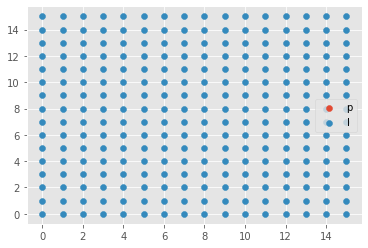

In [3]:
test_ising.show()

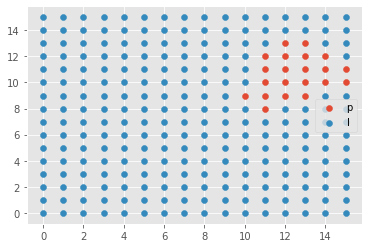

In [4]:
test_ising.cluster_ising(1-np.exp(-0.3 * 2))
test_ising.show()

In [5]:
test_ising.magnetism()

0.8359375

In [8]:
# Train data generation
train = Ising.Ising(10, 10)
x = np.arange(1, 3, 0.0625)
label = []
curr_label = 1
X_train = []
var = []
y = []
N = 10**4
for T in tqdm(x):
    mag = []
    if T >= 2.266:
        curr_label = 0
    else :
        curr_label = 1
    for i in range(N):
        train.cluster_ising(1-np.exp(-(1/T)*2))
    for _ in (range(1000)):
        for _ in range(100):
            train.cluster_ising(1-np.exp(-(1/T)*2))
        mag.append(train.magnetism())
        X_train.append(np.array(train.lattice.reshape((1, train.y*train.x))[0]))
        label.append(curr_label)
    mn = np.mean(mag)
    y.append(mn)
    var.append(np.std(mag))

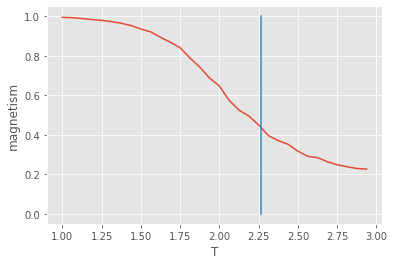

In [9]:
#С рандомными
plt.plot(x, y)
plt.xlabel("T")
plt.ylabel("magnetism")

x_line = np.arange(0,1.1, 0.1)
plt.plot([2.266]*x_line.shape[0], x_line, '-')

## Triangular lattice

In [ ]:
x_ = np.arange(1, 5, 0.1)
N = 1000
for T in tqdm(x_):
    mag = []
    p = 1-np.exp(-(1/T)*2)
    if T >= 2.226:
        N = 10000
    for i in range(N):
        test_ising.cluster_ising(p, "triangular")
    for i in range(100):
        test_ising.cluster_ising(p, "triangular")
        mag.append(test_ising.magnetism())
    mn = np.mean(mag)
    y.append(mn)

In [ ]:
#С рандомными
plt.plot(x_, y)
plt.xlabel("T")
plt.ylabel("magnetism")
x_line = np.arange(0,1.1, 0.1)
plt.plot([3.65]*x_line.shape[0], x_line, '-')

## Training

In [11]:
X = X_train
X_train, X_test, y_train, y_test = train_test_split(X, label)

In [12]:
X_train = np.array(X_train)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(np.array(y_train))

In [104]:
len(train)

4000

In [13]:
X_test = np.array(X_test)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(np.array(y_test))

In [25]:
class Net(torch.nn.Module):
    def __init__(self, input_size = 10*10, hidden_size = 100):
        super().__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.act = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(hidden_size, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

net = Net()

In [26]:
cr = torch.nn.Softmax()
criterion = torch.nn.CrossEntropyLoss()
lr=0.001
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
for e in range(1000):
    net.train()
    output = net.forward(X_train.float())
    loss = criterion(output, y_train.long())
    loss.backward()
    optimizer.step()
    net.zero_grad()
    
    if e % 100 == 0:
        net.eval()
        output_val = net.forward(X_test.float())
        print("val accuracy:", 
              ((np.around(cr(output_val)[:, 1].detach().numpy()) == y_test.detach().numpy()).sum())/y_test.detach().numpy().shape[0],
             "train accuracy:", ((np.around(cr(output)[:, 1].detach().numpy()) == y_train.detach().numpy()).sum())/y_train.detach().numpy().shape[0]) 

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


val accuracy: 0.486125 train accuracy: 0.4977083333333333
val accuracy: 0.664125 train accuracy: 0.6733333333333333
val accuracy: 0.819375 train accuracy: 0.8404166666666667
val accuracy: 0.842625 train accuracy: 0.8799166666666667
val accuracy: 0.847875 train accuracy: 0.9102916666666667
val accuracy: 0.846375 train accuracy: 0.9339583333333333
val accuracy: 0.84025 train accuracy: 0.9528333333333333


KeyboardInterrupt: 

In [102]:
output_soft = cr(output).detach().numpy()
output_val_soft = cr(output_val).detach().numpy()

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.
C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


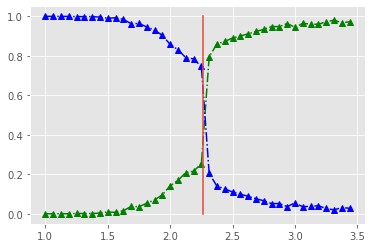

In [105]:
sample_size_train = 100
x_line = np.arange(0,1.2,0.2)
output_0 = [np.mean(output_soft[i*sample_size_train:(i+1)*sample_size_train, 0]) for i in range(x.shape[0])]
plt.plot(x, output_0, '-.^g')
output_1 = [np.mean(output_soft[i*sample_size_train:(i+1)*sample_size_train, 1]) for i in range(x.shape[0])]
plt.plot(x, output_1, '-.^b')
plt.plot([2.266]*x_line.shape[0], x_line, '-')

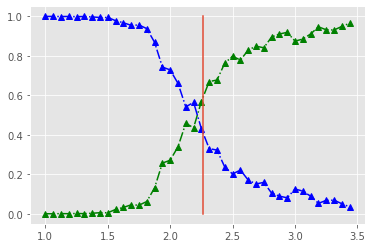

In [106]:
sample_size_val = 100
output_0 = [np.mean(output_val_soft[i*sample_size_val:(i+1)*sample_size_val, 0]) for i in range(x.shape[0])]
plt.plot(x, output_0, '-.^g')
output_1 = [np.mean(output_val_soft[i*sample_size_val:(i+1)*sample_size_val, 1]) for i in range(x.shape[0])]
plt.plot(x, output_1, '-.^b')
x_line = np.arange(0,1.2,0.2)
plt.plot([2.266]*x_line.shape[0], x_line, '-')

In [11]:
# triangular Test data generation
test = Ising.Ising(32, 32)
x = np.arange(1, 3.5, 0.0625)
label_test = []
curr_label = 1
sample_size_test = 200
for T in tqdm(x):
    if T >= 2.266:
        curr_label = 0
    else :
        curr_label = 1
    for i in range(sample_size_test):
        test.cluster_ising(1-np.exp(-(1/T)*2), "triangular", save=True)
        label_test.append(curr_label)
test = np.array(test.all_lattice)
test = torch.from_numpy(test)
labels_test = torch.from_numpy(np.array(label_test))

In [12]:
output = net.forward(test.float())

In [18]:
print("val accuracy:", 
              ((np.around(cr(output)[:, 1].detach().numpy()) == labels_test.detach().numpy()).sum())/labels_test.detach().numpy().shape[0])

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


val accuracy: 0.5365


In [19]:
cr(output)

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[0.0555, 0.9445],
        [0.1159, 0.8841],
        [0.1056, 0.8944],
        ...,
        [0.0625, 0.9375],
        [0.0168, 0.9832],
        [0.0091, 0.9909]], grad_fn=<SoftmaxBackward>)